In [119]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from skimage.data import shepp_logan_phantom

from scipy.signal import convolve2d
from skimage.restoration import wiener
import cv2

In [120]:
# Step 1: Create a Test Image (Phantom)
image_size = 128  # Define image size
phantom = shepp_logan_phantom()
phantom_resized = np.pad(phantom, ((16, 16), (16, 16)), mode='constant')   # Resize to 128x128
# Step 2: Compute Radon Transform (Sinogram)
theta = np.linspace(0., 180., max(phantom_resized.shape), endpoint=False)  # Define projection angles
sinogram = radon(phantom_resized, theta=theta, circle=True) + np.random.normal(loc=0, scale=100, size=(432, 432))

# Step 3: Perform Inverse Radon Transform (Reconstruction)
reconstructed_image = iradon(sinogram, theta=theta, filter_name='ramp')

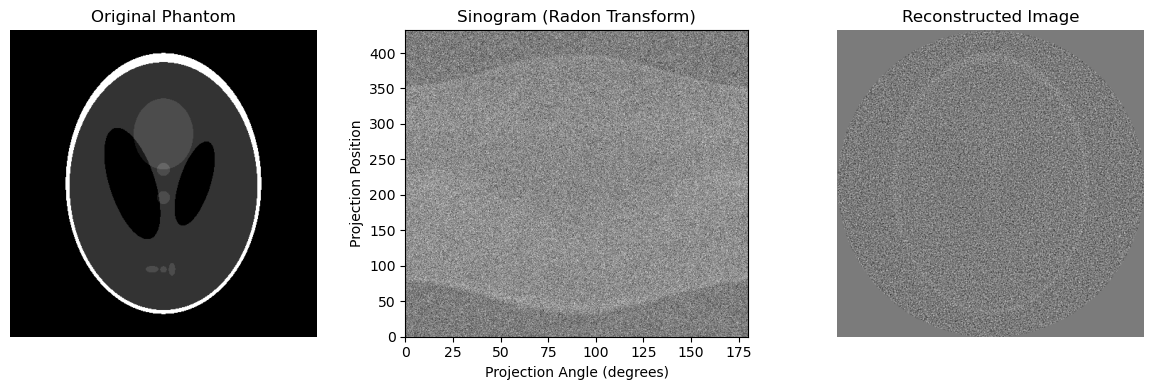

In [121]:
# Step 4: Plot the Original, Sinogram, and Reconstructed Image
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(phantom_resized, cmap='gray')
axes[0].set_title("Original Phantom")
axes[0].axis("off")

axes[1].imshow(sinogram, cmap='gray', aspect='auto', extent=(0, 180, 0, sinogram.shape[0]))
axes[1].set_title("Sinogram (Radon Transform)")
axes[1].set_xlabel("Projection Angle (degrees)")
axes[1].set_ylabel("Projection Position")

axes[2].imshow(reconstructed_image, cmap='gray')
axes[2].set_title("Reconstructed Image")
axes[2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Load an Example Image (Grayscale)
image = cv2.imread(cv2.samples.findFile("lenna.jpeg"), cv2.IMREAD_GRAYSCALE)
image = image / (image.max())
image = cv2.resize(image, (256, 256))  # Resize for simplicity

# Step 2: Define a Motion Blur Kernel (Point Spread Function - PSF)
def motion_blur_kernel(size=15, angle=0):
    """Generate a linear motion blur kernel."""
    kernel = np.zeros((size, size))
    kernel[size // 2, :] = 1  # Horizontal blur
    kernel = cv2.warpAffine(kernel, 
                            cv2.getRotationMatrix2D((size // 2, size // 2), angle, 1), 
                            (size, size))
    kernel /= np.sum(kernel)  # Normalize
    return kernel

# Create motion blur effect
kernel_size = 15
blur_kernel = motion_blur_kernel(size=kernel_size, angle=30) 
blurred_image = convolve2d(image, blur_kernel, mode='same', boundary='wrap') +  np.random.normal(loc=0, scale=.1, size=(256, 256))

# Step 3: Apply Wiener Deconvolution for Deblurring
restored_image = wiener(blurred_image, blur_kernel, balance=0.01)  # Adjust balance factor

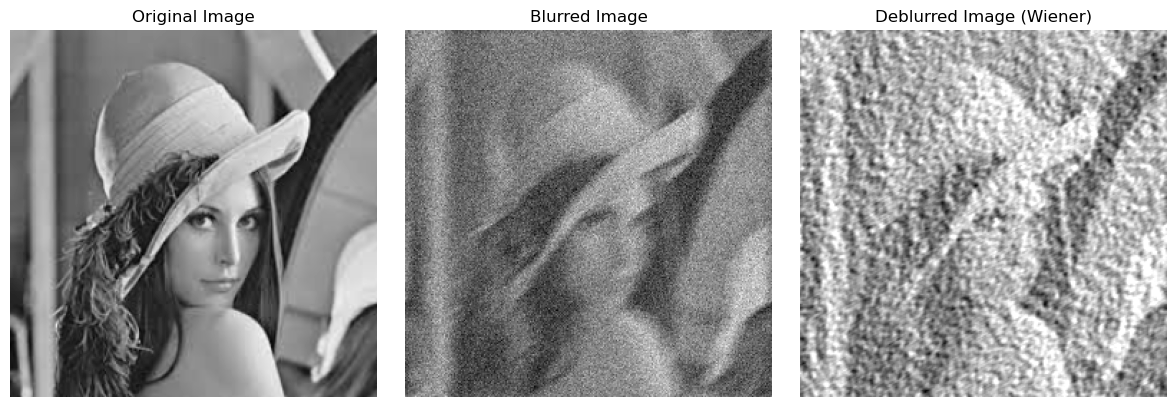

In [144]:
# Step 4: Plot the Images
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(blurred_image, cmap='gray')
ax[1].set_title("Blurred Image")
ax[1].axis("off")

ax[2].imshow(restored_image, cmap='gray')
ax[2].set_title("Deblurred Image (Wiener)")
ax[2].axis("off")

plt.tight_layout()
plt.show()